# K-NN in python: search for the best k

## 1- Load the required modeules

In [14]:
import numpy as np                     # Llibreria matemÃƒÂ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃƒÂ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import pandas as pd
%matplotlib inline                     

## 2- Load the data

In [15]:
df=pd.read_csv("../datasets/NormalizedSpotifyDataset.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration,popularity
1,0.0,-0.6553246374131798,0.32383262091312454,0.3698068373714516,3.2328780463718707,2.3278140552046094,0.5768088710878628,0.9470290108611626,-1.4242773523737737,0.9368145388724062,...,-0.5973707559570185,-0.5225143109685256,-0.6265447165894913,0.47309405318736575,0.08536660806090722,0.2585046185719715,-0.7583768064249115,-0.1987833411948581,0.0382764192998054,2
2,1.0,-0.6553246374131798,0.6400259640918348,0.3698068373714516,0.876533439841487,2.051966042700506,0.10616685999610039,-0.27808622849751236,0.5373037791357987,0.24173707526404314,...,-0.9607158338956964,-0.5296155544681974,0.23018019245521687,-1.5806110453505975,-1.274779931145266,0.2585046185719715,-0.28744064386117,-0.016080073597765372,-0.3283068796236636,2
3,2.0,0.176584483135288,0.6400259640918348,0.3698068373714516,0.6939521683445347,1.7761180301964028,-0.4954785974820291,0.4679540963656807,-0.023147972724079095,0.6218060130259732,...,-0.9234293302644346,-0.5296325624214641,-0.3100343823668303,-0.060660774452957526,1.9585686751947569,0.2585046185719715,0.5366976406253775,-0.38148660879195084,-0.20226056824175237,2
4,3.0,-0.6553246374131798,0.6400259640918348,-1.5033639262839422,2.9093539795604815,1.6841686926950352,-0.3450672331124966,-0.5962504846891684,-0.303373848654018,0.20993269540271478,...,0.41809147059649177,-0.5296325624214641,0.23018019245521687,-1.4509253020723625,-0.4780392828837656,0.2585046185719715,-0.28744064386117,-0.016080073597765372,-0.04346556810644652,2


In [16]:
df.columns = df.iloc[0]
df = df.drop(0)
df.columns = df.columns.fillna('to_drop')
df.drop('to_drop', axis = 1, inplace = True)
df.head()

,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration,popularity
1,-0.6553246374131798,0.32383262091312454,0.3698068373714516,3.2328780463718707,2.3278140552046094,0.5768088710878628,0.9470290108611626,-1.4242773523737737,0.9368145388724062,0.7454893895466356,...,-0.5973707559570185,-0.5225143109685256,-0.6265447165894913,0.47309405318736575,0.08536660806090722,0.2585046185719715,-0.7583768064249115,-0.1987833411948581,0.0382764192998054,2
2,-0.6553246374131798,0.6400259640918348,0.3698068373714516,0.876533439841487,2.051966042700506,0.10616685999610039,-0.27808622849751236,0.5373037791357987,0.24173707526404314,-1.3414007147816598,...,-0.9607158338956964,-0.5296155544681974,0.23018019245521687,-1.5806110453505975,-1.274779931145266,0.2585046185719715,-0.28744064386117,-0.016080073597765372,-0.3283068796236636,2
3,0.176584483135288,0.6400259640918348,0.3698068373714516,0.6939521683445347,1.7761180301964028,-0.4954785974820291,0.4679540963656807,-0.023147972724079095,0.6218060130259732,-1.3414007147816598,...,-0.9234293302644346,-0.5296325624214641,-0.3100343823668303,-0.060660774452957526,1.9585686751947569,0.2585046185719715,0.5366976406253775,-0.38148660879195084,-0.20226056824175237,2
4,-0.6553246374131798,0.6400259640918348,-1.5033639262839422,2.9093539795604815,1.6841686926950352,-0.3450672331124966,-0.5962504846891684,-0.303373848654018,0.20993269540271478,0.7454893895466356,...,0.41809147059649177,-0.5296325624214641,0.23018019245521687,-1.4509253020723625,-0.4780392828837656,0.2585046185719715,-0.28744064386117,-0.016080073597765372,-0.04346556810644652,2
5,-0.6553246374131798,0.007639277734414316,0.3698068373714516,0.009941477758655596,1.3163713426895642,0.9795231692385467,0.2046457464139652,0.2570779032058598,0.4601447460959855,-1.3414007147816598,...,-0.7666144603826035,-0.5296325624214641,1.539161662216331,0.9943390020548691,0.3958657158910729,-5.303183858228962,-0.4444193647157505,-0.5641898763890435,-0.24145891386338766,2


In [17]:
X = df.drop(['popularity', 'key', 'mode', 'tempo', 'time_signature'],axis=1).values  
y = df['popularity'].values
print(X.shape)
print(y.shape)

(8692, 16)
(8692,)


## 10-fold cross-validation

In [18]:
# Method 1
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

(X_train, X_test,  y_train, y_test) = train_test_split(X, y, test_size=.3, random_state=1)

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=X,  
                            y=y,  
                            cv=10, scoring='accuracy')  

# cv_scores is a list with 10 accuracies (one for each validation)
print(cv_scores)

[0.61538462 0.66781609 0.70574713 0.62068966 0.57767549 0.53164557
 0.6547756  0.68778802 0.65552995 0.46658986]


In [19]:
# Let's get the mean of the 10 validations (and standard deviation of them)
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.6183641985880056
0.07059280636266502


In [20]:
# Method 2
# Build confussion matrix of all 10 cross-validations
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X, y=y,  cv=10)  

print(sklearn.metrics.confusion_matrix(y, predicted))
print(sklearn.metrics.accuracy_score(y, predicted))

[[2280  582  189]
 [ 492 1748  747]
 [ 296 1011 1347]]
0.6183847215830649


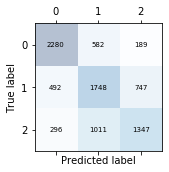

In [21]:
confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

## Finding parameters for k-NN

### Authomatically find best parameters:

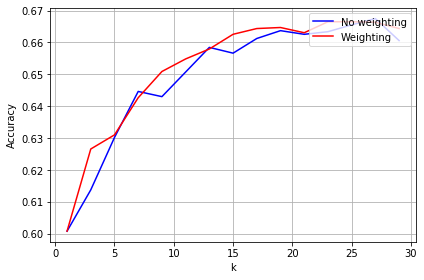

In [23]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

### Do the same using Grid Search method in python

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 27, 'weights': 'uniform'} Accuracy= 0.6674884944115713


Apply models with best parameters found trained with all training data to the test set

In [25]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print(sklearn.metrics.accuracy_score(y_test, pred))

[[689 180  54]
 [ 86 600 222]
 [ 55 298 424]]
0.6568251533742331


In [26]:
# interval confidence
from statsmodels.stats.proportion import proportion_confint

epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
# or equivalent 
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.657 +/- 0.018


(0.6386039561220397, 0.6750463506264265)

In [27]:
#Using Binomial distribution

proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

(0.6378610262292763, 0.6744823155105135)